In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

import os, sys
import re

In [145]:
books = pd.read_csv('./archive/Books.csv')
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg


In [146]:
ratings = pd.read_csv('./archive/Ratings.csv')
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [147]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [148]:
books.shape,ratings.shape

((271360, 8), (1149780, 3))

In [149]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

### Data Cleaning

아래에서 볼 수 있듯이 이 필드에 일부 잘못된 항목이 있습니다. \
출판사 이름 'DK Publishing Inc' 및 'Gallimard'가 csv 파일의 일부 오류로 인해 데이터 세트의 yearOfPublication으로 잘못 로드된 것 같습니다. \
또한 항목 중 일부는 문자열이고 일부 장소에서 같은 연도가 숫자로 입력되었습니다.

In [150]:
books.loc[(books.yearOfPublication == 'DK Publishing Inc')|(books.yearOfPublication == 'Gallimard'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [151]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

**Ratings Dataset**

In [152]:
#새 책이 책 데이터 세트에 추가되지 않는 한 점수 데이터 세트에는 책 데이터 세트에 있는 책만 있어야 합니다.
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

ratings.shape,ratings_new.shape
#책 데이터 세트의 일부가 아닌 책 ISBN가 있는 많은 행이 삭제되었음을 알 수 있습니다.

((1149780, 3), (1031136, 3))

#### 등급은 명시적이며 1-10의 척도로 표시됨. 값이 높을수록 점수가 더 높음을 의미하며 묵시적으로는 0으로 표시됩니다.

In [153]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [154]:
# 0으로 된 데이터세트 제거
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]

(1031136, 3)
(383842, 3)


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

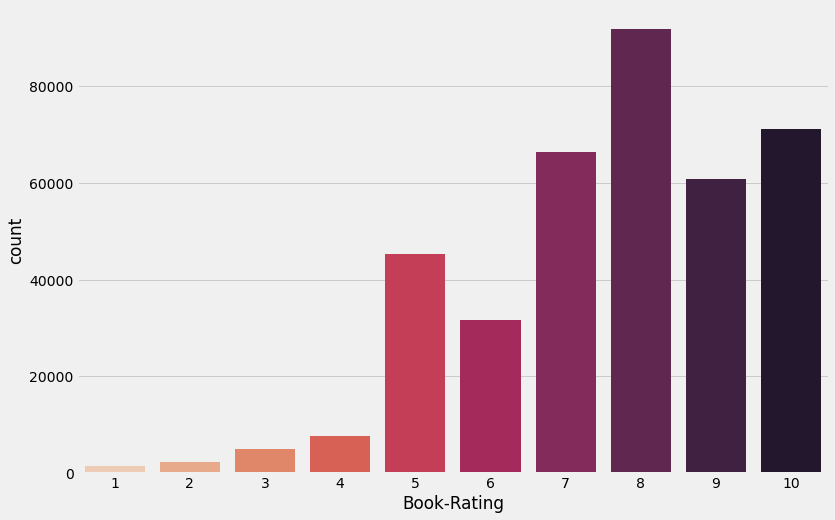

In [155]:
print(ratings_new.shape)
print(ratings_explicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

사용자들 사이에서 높은 등급이 더 일반적이고, 등급 8이 가장 많은 횟수로 평가되었음을 알 수 있습니다.

---

In [177]:
df = ratings_explicit.groupby('ISBN')['Book-Rating'].count().reset_index()
df.columns = ['ISBN','Count']

In [184]:
df_up = df[df.Count >=5]

In [185]:
rating = ratings_explicit[ratings_explicit['ISBN'].isin(df_up.ISBN.unique())]

In [186]:
book = books[books['ISBN'].isin(df_up.ISBN.unique())]

In [187]:
data = pd.merge(rating, book, on='ISBN',how='left')
data.shape

(192228, 7)

In [188]:
data.head(2)

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
1,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch


In [189]:
user_rating=data.pivot_table('Book-Rating',index='bookTitle',columns='User-ID').fillna(0)

In [190]:
from sklearn.metrics.pairwise import cosine_similarity

In [191]:
item_based_collabor = cosine_similarity(user_rating)
item_based_collabor

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.09794651,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09794651, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [192]:
item_based_collabor = pd.DataFrame(data=item_based_collabor, index=user_rating.index, columns=user_rating.index)

In [193]:
item_based_collabor.head()

bookTitle,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),!Yo!,'Salem's Lot,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,"1,000 Places to See Before You Die","1,911 Best Things Anybody Ever Said",10 Lb. Penalty,100 Best-Loved Poems (Dover Thrift Editions),...,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories
bookTitle,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
!Yo!,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
'Salem's Lot,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
01-01-00: A Novel of the Millennium,0.0,0.0,0.0,0.0,1.0,0.153766,0.0,0.0,0.0,0.0,...,0.04783,0.084077,0.0,0.0,0.0,0.0,0.0,0.0,0.103352,0.0


In [232]:
def get_item_based_collabor(title):
    return item_based_collabor[title].sort_values(ascending=False)[:6]

In [240]:
get_item_based_collabor('!Yo!')

bookTitle
!Yo!                                                           1.000000
The Island of Lost Maps: A True Story of Cartographic Crime    0.197257
Black Lotus (A Sano Ichiro Mystery)                            0.186883
Trash                                                          0.186381
Walking to Mercury                                             0.184324
Driving Over Lemons: An Optimist in Andalucia                  0.181530
Name: !Yo!, dtype: float64

**!Yo! 와 유사한 책 추천**

1. The Island of Lost Maps: A True Story of Cartographic Crime    
2. Black Lotus (A Sano Ichiro Mystery)
3. Trash
4. Walking to Mercury
5. Driving Over Lemons: An Optimist in Andalucia